In [1]:
import glob
import pandas as pd
import altair as alt

In [2]:
csv_files = glob.glob("*.csv")

print(csv_files)

['routes_09_2022.csv', 'routes_08_2022.csv', 'routes_05_2022.csv', 'routes_10_2022.csv', 'routes_07_2022.csv', 'routes_06_2022.csv']


In [3]:
csv = pd.concat([pd.read_csv(f, low_memory=False) for f in csv_files])

In [5]:
csv.to_csv("csv.csv", index=False)

In [1]:
import pandas as pd
import altair as alt

data = pd.read_csv("csv.csv")

data.info()

/var/folders/ls/68hvrtfn0nxfx6ydqdjpf86r0000gn/T/ipykernel_3213/402592548.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("csv.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618168 entries, 0 to 618167
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   route_code                618168 non-null  int64  
 1   cyclenumber               618168 non-null  int64  
 2   userID                    618168 non-null  object 
 3   unlockedat                618168 non-null  object 
 4   unlockedattime            618168 non-null  object 
 5   lockedat                  618168 non-null  object 
 6   lockedattime              618168 non-null  object 
 7   startstationserialnumber  618168 non-null  object 
 8   startstationname          618168 non-null  object 
 9   endstationserialnumber    615826 non-null  object 
 10  endstationname            618168 non-null  object 
 11  rfidnumber                618168 non-null  object 
 12  length                    618168 non-null  float64
 13  DurationMinutes           618168 non-null  f

In [2]:
data = data.dropna(subset=["PersonalIdCode"])

data.head()

,route_code,cyclenumber,userID,unlockedat,unlockedattime,lockedat,lockedattime,startstationserialnumber,startstationname,endstationserialnumber,endstationname,rfidnumber,length,DurationMinutes,CycleType,Membership,dateofbirth,PersonalIdCode
1,1661979700895,2143,5835995b-16b3-4d46-9109-b76420850df9,2022-09-01,00:01:40,2022-09-01,00:12:15,30,Vanemuise park,30,Karete,Mobile App,2.89,10.57,Pedelec,30 Day Membership,2006,506
2,1661979881794,3465,779b3d7a-30c2-469f-bb30-b39bdbf55a3c,2022-09-01,00:04:41,2022-09-01,00:13:20,74,Magaziini,74,Tarmeko,RFID Card,2.99,8.65,Pedelec,Joint Membership,2001,500
4,1661979897364,2567,8640d0d4-caf0-430b-aa5f-53b5a3e3762b,2022-09-01,00:04:57,2022-09-01,00:15:37,30,Vanemuise park,30,Karete,RFID Card,5.20,10.67,Bike,Joint Membership,2001,501
6,1661979965282,3505,0161208b-835b-4a6a-84eb-4e78881e3ca4,2022-09-01,00:06:05,2022-09-01,00:19:15,58,Põllu,58,Rüütli,Mobile App,2.73,13.17,Pedelec,1 Year Membership,2003,502
7,1661979966074,4439,af3a00ec-ce61-4252-b687-e6a24014409e,2022-09-01,00:06:06,2022-09-01,00:19:40,58,Põllu,58,Rüütli,Mobile App,2.70,13.58,Pedelec,1 Year Membership,2002,601


In [3]:
year = 2022  
data['age'] = year - data['dateofbirth']
data.head()

,route_code,cyclenumber,userID,unlockedat,unlockedattime,lockedat,lockedattime,startstationserialnumber,startstationname,endstationserialnumber,endstationname,rfidnumber,length,DurationMinutes,CycleType,Membership,dateofbirth,PersonalIdCode,age
1,1661979700895,2143,5835995b-16b3-4d46-9109-b76420850df9,2022-09-01,00:01:40,2022-09-01,00:12:15,30,Vanemuise park,30,Karete,Mobile App,2.89,10.57,Pedelec,30 Day Membership,2006,506,16
2,1661979881794,3465,779b3d7a-30c2-469f-bb30-b39bdbf55a3c,2022-09-01,00:04:41,2022-09-01,00:13:20,74,Magaziini,74,Tarmeko,RFID Card,2.99,8.65,Pedelec,Joint Membership,2001,500,21
4,1661979897364,2567,8640d0d4-caf0-430b-aa5f-53b5a3e3762b,2022-09-01,00:04:57,2022-09-01,00:15:37,30,Vanemuise park,30,Karete,RFID Card,5.20,10.67,Bike,Joint Membership,2001,501,21
6,1661979965282,3505,0161208b-835b-4a6a-84eb-4e78881e3ca4,2022-09-01,00:06:05,2022-09-01,00:19:15,58,Põllu,58,Rüütli,Mobile App,2.73,13.17,Pedelec,1 Year Membership,2003,502,19
7,1661979966074,4439,af3a00ec-ce61-4252-b687-e6a24014409e,2022-09-01,00:06:06,2022-09-01,00:19:40,58,Põllu,58,Rüütli,Mobile App,2.70,13.58,Pedelec,1 Year Membership,2002,601,20


In [4]:
def get_gender(PersonalIdCode):
    PersonalIdCode_str = str(PersonalIdCode)
    if PersonalIdCode_str[0].isdigit():
        first_digit = int(PersonalIdCode_str[0])
        return 'Male' if first_digit % 2 == 1 else 'Female'
    else:
        return 'Unknown'
    
data['gender'] = data['PersonalIdCode'].apply(get_gender)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472709 entries, 1 to 618166
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   route_code                472709 non-null  int64  
 1   cyclenumber               472709 non-null  int64  
 2   userID                    472709 non-null  object 
 3   unlockedat                472709 non-null  object 
 4   unlockedattime            472709 non-null  object 
 5   lockedat                  472709 non-null  object 
 6   lockedattime              472709 non-null  object 
 7   startstationserialnumber  472709 non-null  object 
 8   startstationname          472709 non-null  object 
 9   endstationserialnumber    471051 non-null  object 
 10  endstationname            472709 non-null  object 
 11  rfidnumber                472709 non-null  object 
 12  length                    472709 non-null  float64
 13  DurationMinutes           472709 non-null  f

In [5]:
data = data[data['gender'] != 'Unknown']

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472409 entries, 1 to 618166
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   route_code                472409 non-null  int64  
 1   cyclenumber               472409 non-null  int64  
 2   userID                    472409 non-null  object 
 3   unlockedat                472409 non-null  object 
 4   unlockedattime            472409 non-null  object 
 5   lockedat                  472409 non-null  object 
 6   lockedattime              472409 non-null  object 
 7   startstationserialnumber  472409 non-null  object 
 8   startstationname          472409 non-null  object 
 9   endstationserialnumber    470752 non-null  object 
 10  endstationname            472409 non-null  object 
 11  rfidnumber                472409 non-null  object 
 12  length                    472409 non-null  float64
 13  DurationMinutes           472409 non-null  f

In [6]:
grouped_data = data.groupby(['gender', 'age']).size().reset_index(name='count')

grouped_data['count_gender'] = grouped_data.apply(lambda row: row['count'] if row['gender'] == 'Female' else -row['count'], axis=1)

grouped_data.head()

,gender,age,count,count_gender
0,Female,14,2130,2130
1,Female,15,17108,17108
2,Female,16,8309,8309
3,Female,17,10248,10248
4,Female,18,9436,9436


In [7]:

chart = alt.Chart(grouped_data).mark_bar().encode(
    x=alt.X('count_gender:Q', axis=alt.Axis(title='Population'), scale=alt.Scale(domain=(-30000, 30000))),
    y=alt.Y('age:O', axis=alt.Axis(title='Age'), scale=alt.Scale(zero=False), sort='descending'),
    color=alt.Color('gender:N', scale=alt.Scale(range=['#FFC000', '#00B050']), legend=alt.Legend(title='Gender')),
    tooltip=['gender', 'age', 'count']
).properties(width=600, height=400, title='Population Pyramid May-Oct 2022')

chart

alt.Chart(...)

In [13]:
# Calculate the count of each type of bike used by each gender
bike_counts = data.groupby(['gender', 'CycleType']).size().reset_index(name='counts')

# Calculate the total counts for each gender
total_counts = bike_counts.groupby('gender')['counts'].sum().reset_index(name='total_counts')

# Merge the bike counts and total counts dataframes
bike_counts = pd.merge(bike_counts, total_counts, on='gender')

# Calculate the percentage for each type of bike within each gender
bike_counts['percentage'] = bike_counts['counts'] / bike_counts['total_counts'] * 100

# Create a stacked bar chart
chart = alt.Chart(bike_counts).mark_bar().encode(
    x=alt.X('gender:N'),
    y=alt.Y('percentage:Q', stack='normalize'),
    color='CycleType:N',
    tooltip=['gender', 'CycleType', 'percentage']
)

chart

alt.Chart(...)

In [24]:
bike_counts.head()

,gender,CycleType,counts,total_counts,percentage,percentage_str
0,Female,Bike,29258,190578,15.352244,15.35%
1,Female,Pedelec,161320,190578,84.647756,84.65%
2,Male,Bike,44537,281831,15.802733,15.80%
3,Male,Pedelec,237294,281831,84.197267,84.20%


In [27]:
# Create a stacked bar chart
chart = alt.Chart(bike_counts).mark_bar().encode(
    y=alt.Y('gender:N'),
    x=alt.X('percentage:Q', stack='normalize'),
    color='CycleType:N',
    tooltip=['gender', 'CycleType', 'percentage']
)

chart


alt.Chart(...)

In [22]:
import numpy as np
import altair as alt

grouped_data['age'] = grouped_data['age'].astype(int)

# Filter out values where 'age' > 100
grouped_data = grouped_data[grouped_data['age'] <= 94]

# Create a new column 'age_group' that groups the ages in two-year intervals
grouped_data['age_group'] = pd.cut(grouped_data['age'], 
                                              bins=np.arange(14, 96, 5), 
                                              include_lowest=True, 
                                              right=False)

# Convert the intervals to string
grouped_data['age_group'] = grouped_data['age_group'].astype(str)

# Now you create your chart using the 'age_group' column for the y-axis
chart = alt.Chart(grouped_data).mark_bar().encode(
    x=alt.X('count_gender:Q', axis=alt.Axis(title='Population'), scale=alt.Scale(domain=(-100000, 100000))),
    y=alt.Y('age_group:O', axis=alt.Axis(title='Age'), scale=alt.Scale(zero=False), sort='descending'),
    color=alt.Color('gender:N', scale=alt.Scale(range=['#FFC000', '#00B050']), legend=alt.Legend(title='Gender')),
    tooltip=['gender', 'age', 'count']
).properties(width=600, height=400, title='Population Pyramid May to October 2022')

chart

/var/folders/ls/68hvrtfn0nxfx6ydqdjpf86r0000gn/T/ipykernel_6552/1737078317.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data['age_group'] = pd.cut(grouped_data['age'],
/var/folders/ls/68hvrtfn0nxfx6ydqdjpf86r0000gn/T/ipykernel_6552/1737078317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data['age_group'] = grouped_data['age_group'].astype(str)


alt.Chart(...)

In [36]:
# Convert 'percentage' to proportions and then to formatted string
bike_counts['percentage_str'] = bike_counts['percentage'].apply(lambda x: '{:.2%}'.format(x / 100))

# Create a stacked bar chart with bars
bar = alt.Chart(bike_counts).mark_bar().encode(
    y=alt.Y('gender:N'),
    x=alt.X('percentage:Q', stack='normalize', axis=alt.Axis(format='%')), # Format the x-axis values as percentages
    color='CycleType:N',
    tooltip=['gender', 'CycleType', 'percentage']
)

# Add text labels to the bars
text = bar.mark_text(
    align='center',
    baseline='middle',
    color=
    text='15'  # Use formatted string for text
)

# Combine the bar and text marks
chart = (bar + text)

chart


alt.LayerChart(...)

In [20]:
# Create a stacked bar chart
bar = alt.Chart(bike_counts).mark_bar().encode(
    y=alt.Y('gender:N'),
    x=alt.X('percentage:Q', stack='normalize', axis=alt.Axis(format='%')), # Format the x-axis values as percentages
    color='CycleType:N',
    tooltip=['gender', 'CycleType', 'percentage']
)

# Add text labels to the bars manually
text_left = bar.mark_text(
    align='left',
    baseline='middle',
    dx=-3,  # Nudges text to left so it doesn't appear on top of the bar
    text='15%'  # Manually insert text
)

text_right = bar.mark_text(
    align='right',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
    text='85%'  # Manually insert text
)

# Combine the bar and text marks
chart = (bar + text_left + text_right)

chart

alt.LayerChart(...)

In [28]:
# Convert 'percentage' to proportions and then to formatted string
bike_counts['percentage_str'] = bike_counts['percentage'].apply(lambda x: '{:.2%}'.format(x / 100))

# Create a stacked bar chart with bars
bar = alt.Chart(bike_counts).mark_bar().encode(
    y=alt.Y('gender:N'),
    x=alt.X('percentage:Q', stack='normalize', axis=alt.Axis(format='%')), # Format the x-axis values as percentages
    color='CycleType:N',
    tooltip=['gender', 'CycleType', 'percentage']
)

# Add text labels to the bars
text = bar.mark_text(
    align='center',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
    text=alt.Text('percentage_str:N')  # Use formatted string for text
)

# Combine the bar and text marks
chart = (bar + text)

chart

SchemaValidationError: Invalid specification

        altair.vegalite.v4.schema.core.MarkDef->0, validating 'anyOf'

        {'field': 'percentage_str', 'type': 'nominal'} is not valid under any of the given schemas
        

In [29]:
bike_counts


,gender,CycleType,counts,total_counts,percentage,percentage_str
0,Female,Bike,29258,190578,15.352244,15.35%
1,Female,Pedelec,161320,190578,84.647756,84.65%
2,Male,Bike,44537,281831,15.802733,15.80%
3,Male,Pedelec,237294,281831,84.197267,84.20%


In [37]:
import altair as alt

# Generate the bar chart
bar = alt.Chart(bike_counts).mark_bar().encode(
    x=alt.X('percentage:Q', stack='normalize', axis=alt.Axis(format='%'), title='Percentage'),
    y=alt.Y('gender:N', title='Gender'),
    color=alt.Color('CycleType:N', title='Cycle Type'),
    tooltip=['gender', 'CycleType', 'percentage_str']
)

# Generate the text for each bar
text = bar.mark_text(
    align='center',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('percentage_str:N')  # Use formatted string for text
)

# Combine the bar and text marks
chart = (bar + text)

chart.display()


alt.LayerChart(...)

In [38]:
import altair as alt

# Generate the bar chart
bar = alt.Chart(bike_counts).mark_bar().encode(
    x=alt.X('percentage:Q', stack='zero', title='Percentage'),
    y=alt.Y('gender:N', title='Gender'),
    color=alt.Color('CycleType:N', title='Cycle Type'),
    tooltip=['gender', 'CycleType', 'percentage_str']
)

# Generate the text for each bar
text = bar.mark_text(
    align='center',
    baseline='middle',
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('percentage_str:N')  # Use formatted string for text
)

# Combine the bar and text marks
chart = (bar + text)

chart.display()


alt.LayerChart(...)

In [32]:
import altair as alt

# Generate the bar chart
bar = alt.Chart(bike_counts).mark_bar().encode(
    x=alt.X('percentage:Q', stack='zero', title='Percentage'),
    y=alt.Y('gender:N', title='Gender'),
    color=alt.Color('CycleType:N', title='Cycle Type'),
    tooltip=['gender', 'CycleType', 'percentage_str']
)

# Combine the bar and text marks
chart = bar

chart.display()


alt.Chart(...)

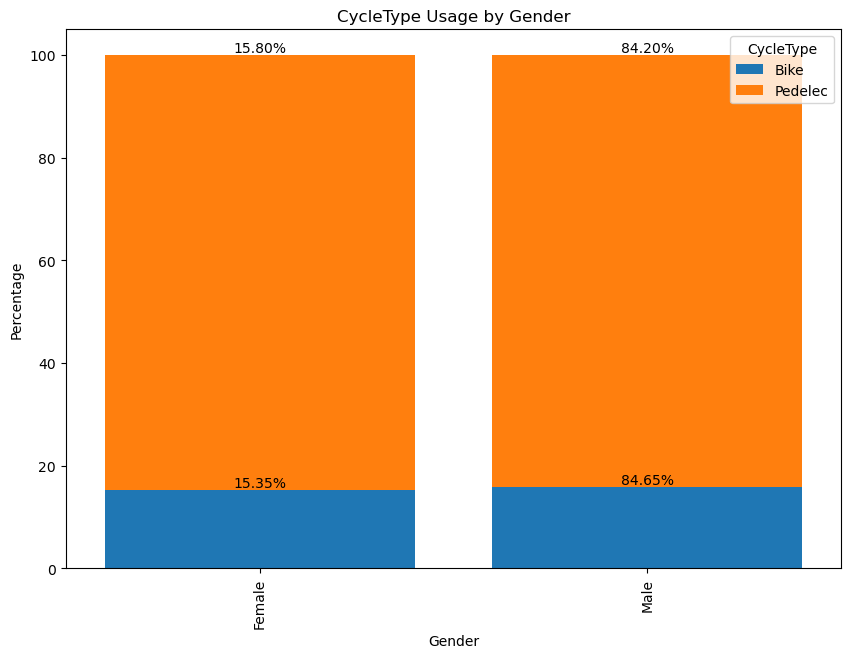

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming bike_counts is your DataFrame
df = bike_counts

# Pivot the data
df_pivot = df.pivot(index='gender', columns='CycleType', values='percentage')

# Plot stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(8,4))

# Add percentage labels
for i, rect in enumerate(plt.bar(df_pivot.index, df_pivot['Bike'])):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{df.loc[i, "percentage_str"]}', ha='center', va='bottom')

for i, rect in enumerate(plt.bar(df_pivot.index, df_pivot['Pedelec'], bottom=df_pivot['Bike'])):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, df_pivot['Bike'].iloc[i] + height, f'{df.loc[i+2, "percentage_str"]}', ha='center', va='bottom')

plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.title('CycleType Usage by Gender')
plt.show()


In [34]:
bike_counts = data.groupby(['gender', 'CycleType']).size().reset_index(name='counts')

# Calculate the total counts for each gender
total_counts = bike_counts.groupby('gender')['counts'].sum().reset_index(name='total_counts')

# Merge the bike counts and total counts dataframes
bike_counts = pd.merge(bike_counts, total_counts, on='gender')

# Calculate the percentage for each type of bike within each gender
bike_counts['percentage'] = bike_counts['counts'] / bike_counts['total_counts'] * 100


KeyError: 'percentage_str'

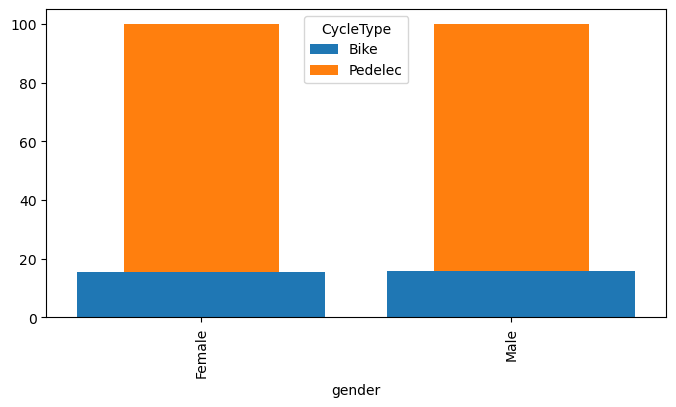

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming bike_counts is your DataFrame
df = bike_counts

# Pivot the data
df_pivot = df.pivot(index='gender', columns='CycleType', values='percentage')

# Plot stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(8,4))

# Add percentage labels
for i, rect in enumerate(plt.bar(df_pivot.index, df_pivot['Bike'])):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{df.loc[i, "percentage_str"]}', ha='center', va='bottom')

for i, rect in enumerate(plt.bar(df_pivot.index, df_pivot['Pedelec'], bottom=df_pivot['Bike'])):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, df_pivot['Bike'].iloc[i] + height, f'{df.loc[i+2, "percentage_str"]}', ha='center', va='bottom')

plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.title('CycleType Usage by Gender')
plt.show()


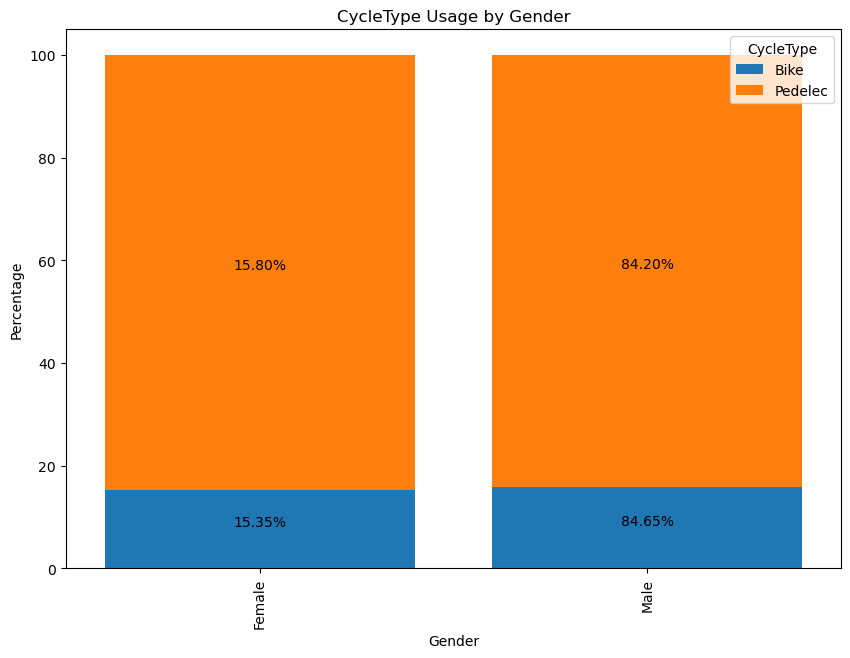

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming bike_counts is your DataFrame
df = bike_counts

# Pivot the data
df_pivot = df.pivot(index='gender', columns='CycleType', values='percentage')

# Plot stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(10,7))

# Add percentage labels
for i, rect in enumerate(plt.bar(df_pivot.index, df_pivot['Bike'])):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height/2, f'{df.loc[i, "percentage_str"]}', ha='center', va='bottom')

for i, rect in enumerate(plt.bar(df_pivot.index, df_pivot['Pedelec'], bottom=df_pivot['Bike'])):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, df_pivot['Bike'].iloc[i] + height/2, f'{df.loc[i+2, "percentage_str"]}', ha='center', va='bottom')

plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.title('CycleType Usage by Gender')
plt.show()


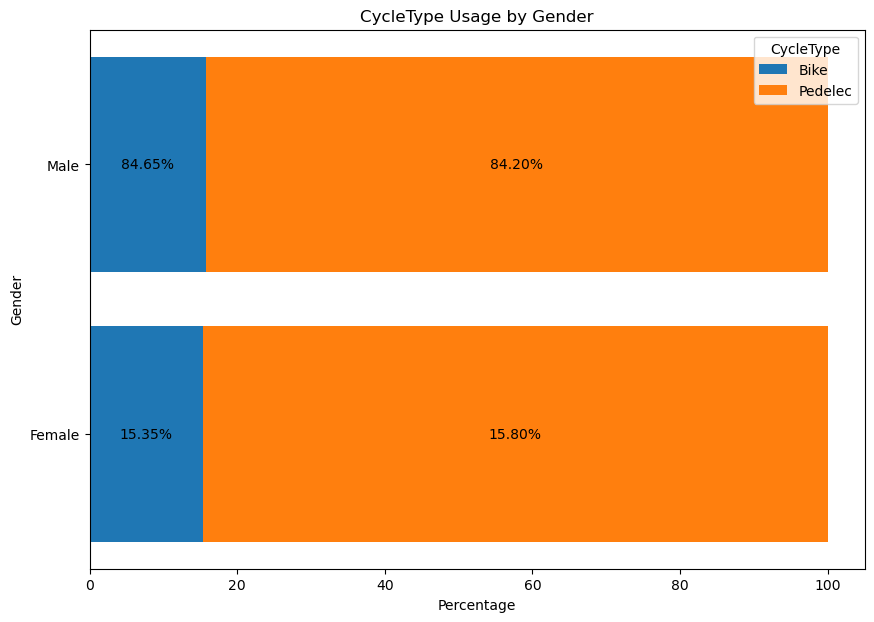

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming bike_counts is your DataFrame
df = bike_counts

# Pivot the data
df_pivot = df.pivot(index='gender', columns='CycleType', values='percentage')

# Plot horizontal stacked bar chart
df_pivot.plot(kind='barh', stacked=True, figsize=(10,7))

# Add percentage labels
for i, rect in enumerate(plt.barh(df_pivot.index, df_pivot['Bike'])):
    width = rect.get_width()
    plt.text(width/2, rect.get_y() + rect.get_height()/2.0, f'{df.loc[i, "percentage_str"]}', ha='center', va='center')

for i, rect in enumerate(plt.barh(df_pivot.index, df_pivot['Pedelec'], left=df_pivot['Bike'])):
    width = rect.get_width()
    plt.text(df_pivot['Bike'].iloc[i] + width/2, rect.get_y() + rect.get_height()/2.0, f'{df.loc[i+2, "percentage_str"]}', ha='center', va='center')

plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.title('CycleType Usage by Gender')
plt.show()


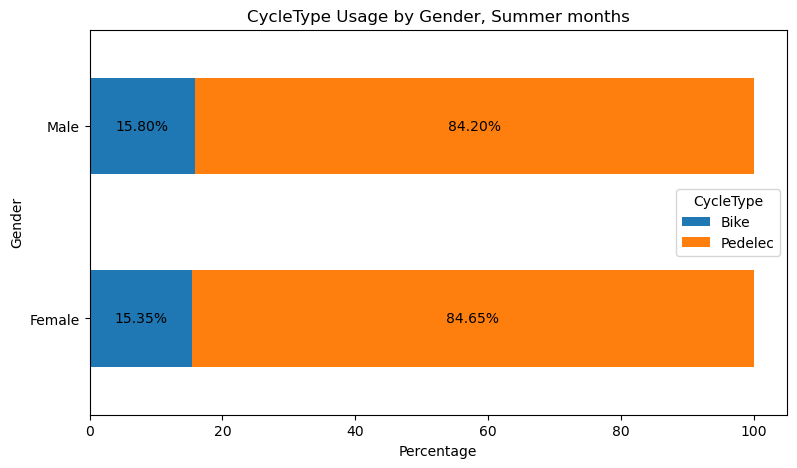

In [44]:

# Assuming bike_counts is your DataFrame
df = bike_counts

# Pivot the data
df_pivot = df.pivot(index='gender', columns='CycleType', values='percentage')

# Plot horizontal stacked bar chart
df_pivot.plot(kind='barh', stacked=True, figsize=(9,5))

# Add percentage labels
for i in df_pivot.index:
    for j in df_pivot.columns:
        # Get percentage from original dataframe
        percentage_str = df.loc[(df['gender'] == i) & (df['CycleType'] == j), 'percentage_str'].values[0]

        # Position of text
        if j == 'Bike':
            width = df_pivot.loc[i, j]
            plt.text(width/2, df_pivot.index.get_loc(i), percentage_str, ha='center', va='center')
        else:  # 'Pedelec'
            width_bike = df_pivot.loc[i, 'Bike']
            width_pedelec = df_pivot.loc[i, j]
            plt.text(width_bike + width_pedelec/2, df_pivot.index.get_loc(i), percentage_str, ha='center', va='center')

plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.title('CycleType Usage by Gender, Summer months')
plt.show()


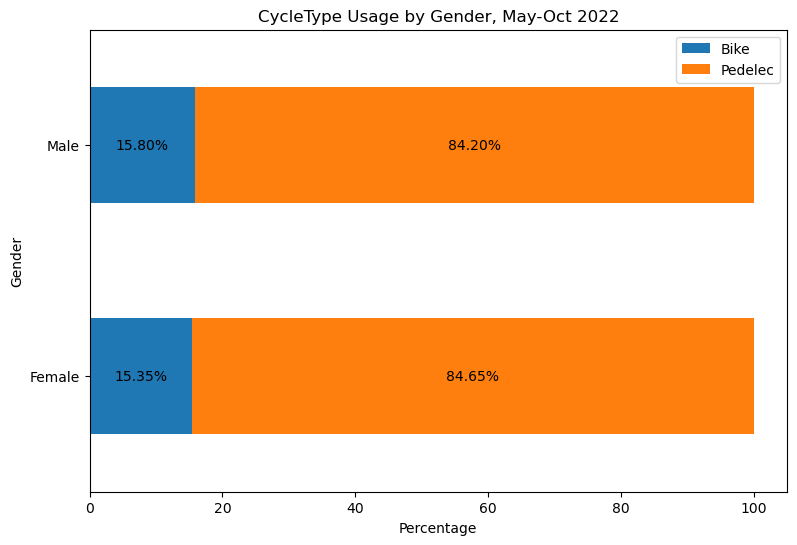

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming bike_counts is your DataFrame
df = bike_counts

# Pivot the data
df_pivot = df.pivot(index='gender', columns='CycleType', values='percentage')

# Plot horizontal stacked bar chart
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(9,6))

# Add percentage labels
for i in df_pivot.index:
    for j in df_pivot.columns:
        # Get percentage from original dataframe
        percentage_str = df.loc[(df['gender'] == i) & (df['CycleType'] == j), 'percentage_str'].values[0]

        # Position of text
        if j == 'Bike':
            width = df_pivot.loc[i, j]
            plt.text(width/2, df_pivot.index.get_loc(i), percentage_str, ha='center', va='center')
        else:  # 'Pedelec'
            width_bike = df_pivot.loc[i, 'Bike']
            width_pedelec = df_pivot.loc[i, j]
            plt.text(width_bike + width_pedelec/2, df_pivot.index.get_loc(i), percentage_str, ha='center', va='center')

plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.title('CycleType Usage by Gender, May-Oct 2022')

# Move the legend
ax.legend(loc='upper right')

plt.show()

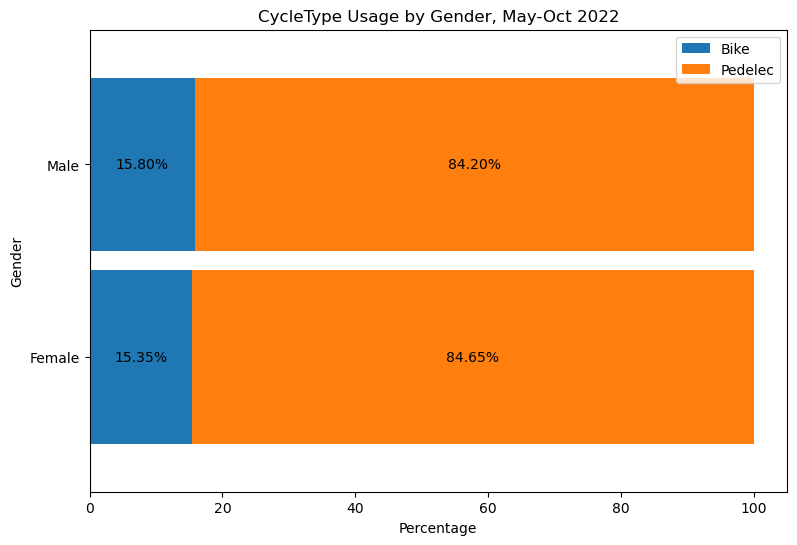

In [47]:

# Assuming bike_counts is your DataFrame
df = bike_counts

# Pivot the data
df_pivot = df.pivot(index='gender', columns='CycleType', values='percentage')

# Increase bar width to reduce the gap between the bars
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(9,6), width=0.9)

# Add percentage labels
for i in df_pivot.index:
    for j in df_pivot.columns:
        # Get percentage from original dataframe
        percentage_str = df.loc[(df['gender'] == i) & (df['CycleType'] == j), 'percentage_str'].values[0]

        # Position of text
        if j == 'Bike':
            width = df_pivot.loc[i, j]
            plt.text(width/2, df_pivot.index.get_loc(i), percentage_str, ha='center', va='center')
        else:  # 'Pedelec'
            width_bike = df_pivot.loc[i, 'Bike']
            width_pedelec = df_pivot.loc[i, j]
            plt.text(width_bike + width_pedelec/2, df_pivot.index.get_loc(i), percentage_str, ha='center', va='center')

plt.xlabel('Percentage')
plt.ylabel('Gender')
plt.title('CycleType Usage by Gender, May-Oct 2022')

# Move the legend
ax.legend(loc='upper right')

plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data[['gender', 'age']]  # features
y = data['DurationMinutes']  # target variable

# one-hot encoding for the categorical variable 'gender'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['gender'])],
    remainder='passthrough')

# defining the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# training the model
model.fit(X_train, y_train)

# predict on your test data or any new data
predictions = model.predict(X_test)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('R-squared:', r2_score(y_test, predictions))

Mean Absolute Error: 13.264630046558523
Mean Squared Error: 1796.5994035359743
R-squared: 0.00034365009919468115


In [12]:
print('Intercept:', model.named_steps['regressor'].intercept_)
print('Coefficients:', model.named_steps['regressor'].coef_)

Intercept: 16.412087742947055
Coefficients: [-0.38501988  0.38501988  0.03981522]
